# Ohjelmointitekniikoita

Tässä harjoituksessa treenataan sekä syntaktisia rakenteita että erilaisia lähestymistapoja.

## Chinook

[Chinook-aineisto](https://github.com/xivSolutions/ChinookDb_Pg_Modified) kuvaa kuvitteellisen levykaupan tietokantaa.
Alla on kaavio skeemasta:
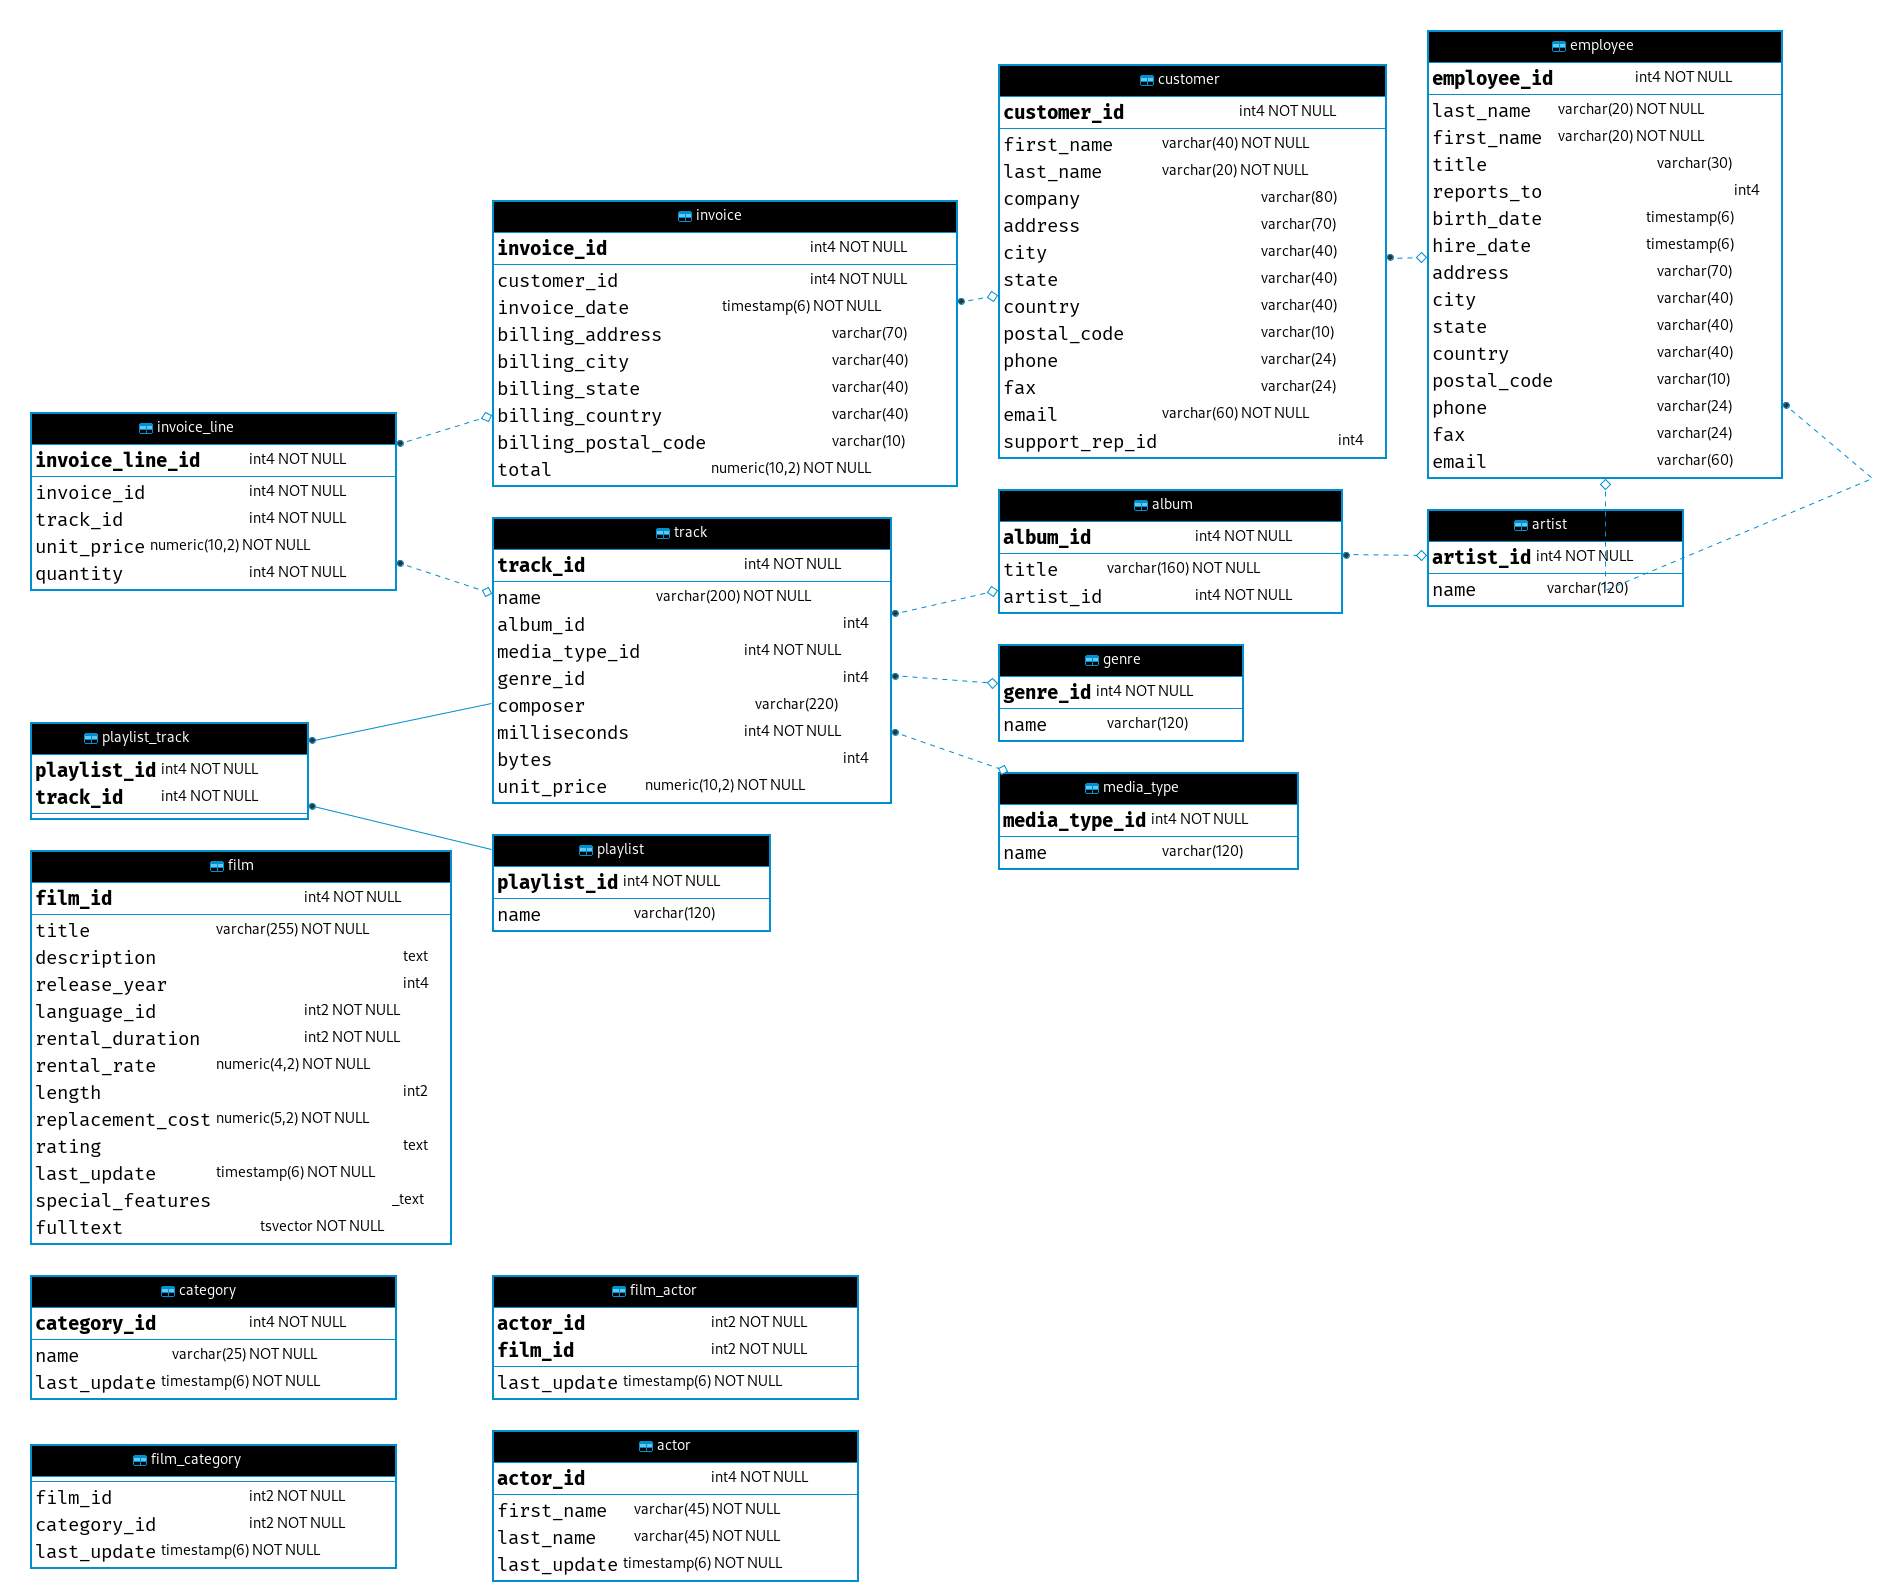

Voit nyt asettaa aineiston sisältävän `chinook`-skeeman hakupolkuun:

In [ ]:
SET search_path = chinook;

## Tehtävä 1

Luo kysely, joka palauttaa taulun `track` sarakkeet `composer` ja `milliseconds`.
Järjestä rivit laskevasti sarakkeen `milliseconds` mukaan ja palauta vain kymmenen ensimmäistä riviä.
Älä ota mukaan rivejä, joissa `composer` on `NULL`.

## Tehtävä 2

Kirjoita edellisen tehtävän kyselyn ympärille [SQL-funktio](https://www.postgresql.org/docs/12/sql-createfunction.html) `list_track_composers_and_length`, joka kuitenkin edellisestä tehtävästä poiketen palauttaa niin monta riviä, kuin funktion `IN`-argumentti `row_limit` määrittää.

Kirjoita funktion paluuarvo muodossa `RETURNS TABLE(column_name column_type, …)`.
Siihen löytyy malli [täältä](https://www.postgresql.org/docs/12/sql-createfunction.html#SQL-CREATEFUNCTION-EXAMPLES).

Kutsu funktiota arvolla 10.

Voit käyttää seuraavaa pohjaksi:
```sql
DROP ROUTINE IF EXISTS list_track_composers_and_length;

-- Write the function here.

SELECT * FROM list_track_composers_and_length(10);
```

Mikä on tälle funktiolle sopiva volatiliteetti?

In [ ]:
DROP ROUTINE IF EXISTS list_track_composers_and_length;

-- Write the function here.

SELECT * FROM list_track_composers_and_length(10);

## Tehtävä 3

Kirjoita kysely, joka listaa nimeltä kerran kaikki soittolistat (`playlist`), jotka sisältävät edes yhden kappaleen (`track`) genreä, jonka `genre_id` on 24.
Tuloksessa tulee olla vain sarake `playlist_name`, joka on järjestetty sarakkeen `playlist_id` mukaan nousevasti.
Voit hyödyntää tarvittaessa [common table expressionia (CTE)](https://www.postgresql.org/docs/12/queries-with.html).

## Tehtävä 4

Kääräise jälleen edellisen tehtävän kysely SQL-funktioon `get_genre_playlist_names` niin, että kysely kohdistuu funktion syötteenä annettuun genreen (`genre_id`).
Anna tulos `OUT`-argumentin kautta.

Kirjoita funktion paluuarvo muodossa `RETURNS SETOF …`. Siihen löytyy ohje [täältä](https://www.postgresql.org/docs/12/sql-createfunction.html) kohdasta `rettype`.

Kutsu funktiota argumentilla `(SELECT genre_id FROM genre WHERE name = 'Classical')`.

Voit käyttää seuraavaa pohjaksi:
```sql
DROP ROUTINE IF EXISTS get_genre_playlist_names;

-- Write the function here.

-- Call the function here.
```

In [ ]:
DROP ROUTINE IF EXISTS get_genre_playlist_names;

-- Write the function here.

-- Call the function here.

## Lisätehtävä 5

Kirjoita toiminnallisuudeltaan tismalleen edellistä tehtävää vastaava PL/pgSQL-funktio.

Käytä kerran taululiitoksen sijaan [`FOR list_id IN query LOOP`-rakennetta](https://www.postgresql.org/docs/12/plpgsql-control-structures.html#PLPGSQL-RECORDS-ITERATING).

Kutsu funktiota argumentilla `(SELECT genre_id FROM genre WHERE name = 'Classical')`.

Tämä toteutustapa ei ole PostgreSQL-yhteisön suosima. Kumpi funktiototeutus vaikuttaa sinusta selvemmältä?

In [ ]:
DROP ROUTINE IF EXISTS get_genre_playlist_names;

-- Write the function here.

-- Call the function here.

## ITIS

[ITIS-aineisto](https://www.itis.gov/) kuvaa eliölajien taksonomiaa.
Alla on kaavio sen skeemasta:
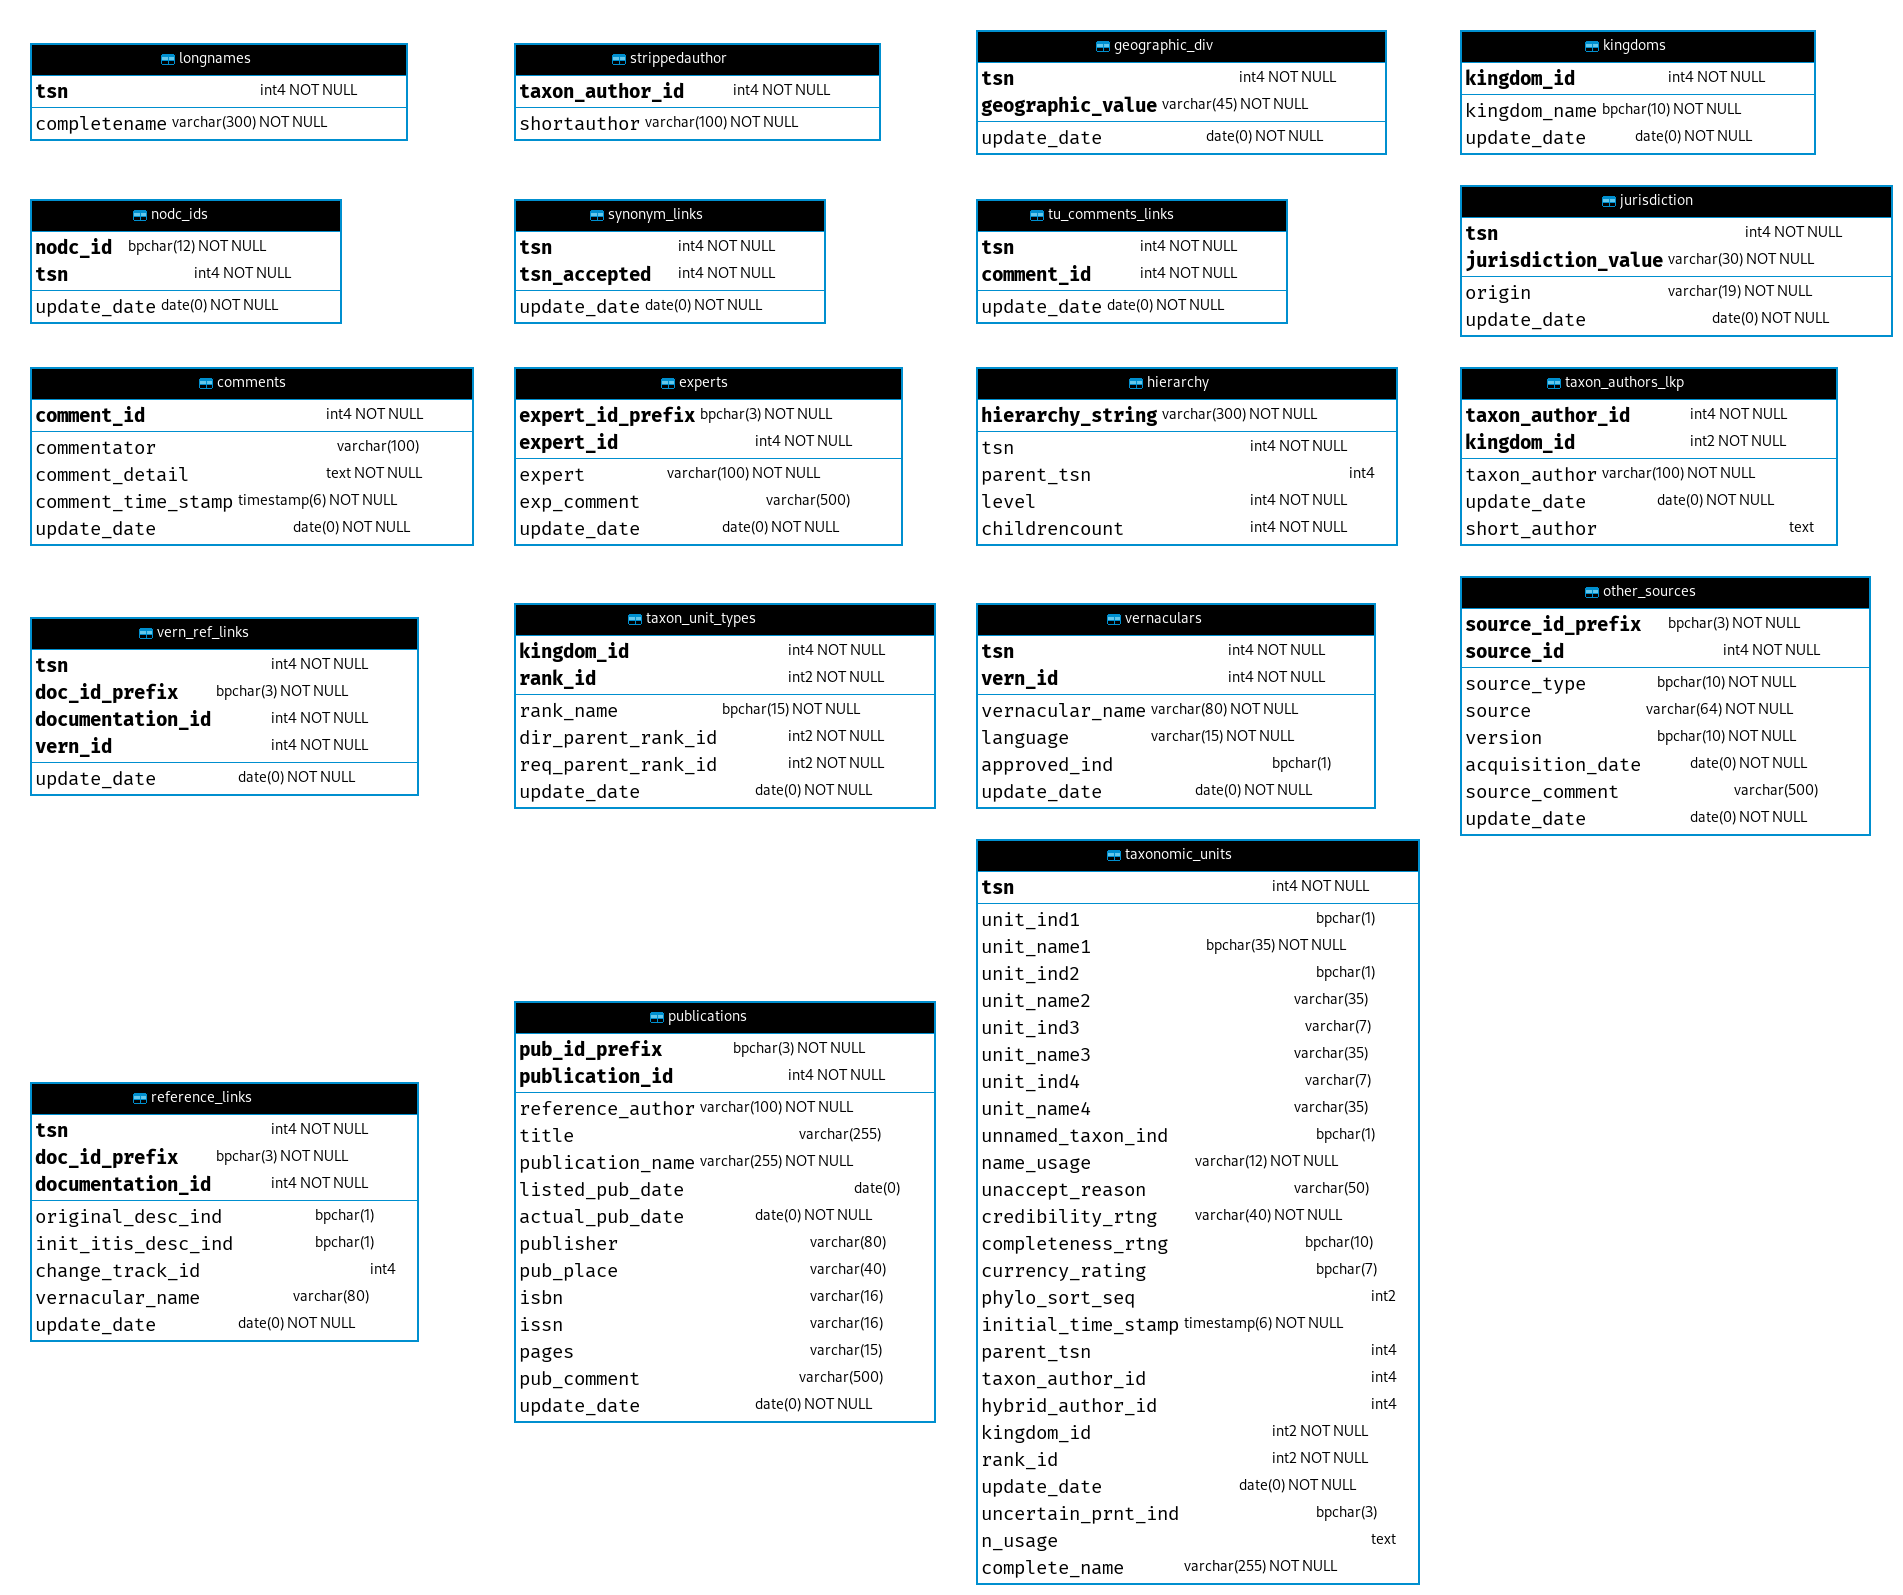
Silmäile erityisesti tauluja `hierarchy` ja `taxonomic_units`.
Huomaa, ettei skeemaan ole tehty foreign key -viittauksia.

Voit nyt asettaa aineiston sisältävän `itis`-skeeman hakupolkuun:

In [ ]:
SET search_path = itis;

## Lisätehtävä 6

Tee kysely, joka laskee, kuinka monta noodia kussakin eliökunnassa ("kingdom") on.
Eliökuntia ovat esimerkiksi bakteerit, eläimet ja sienet.
Myös lajipuun sisäiset luokittelunoodit tulee laskea mukaan.

Tuloksessa tulee olla sarakkeet `kingdom_tsn` ja `count`.
Järjestä tulos `count`-sarakkeen mukaan laskevasti.

Käytä avuksi [rekursiivista kyselyä](https://www.postgresql.org/docs/12/queries-with.html), joka hyödyntää vain taulun `hierarchy` sarakkeita `tsn` ja `parent_tsn`.
Aloita eliökunnista ja etene puussa kohti yksittäisiä lajeja.

Eliökunnan `parent_tsn` on 0, ei `NULL`.

## Lisätehtävä 7

Seuraavaksi listaa taksonomiapuun 100 ensimmäistä noodia hierarkiaketjun pituuden mukaan järjestettynä.

Lopputuloksessa tulee olla sarakkeet `tsn`, `heritage` (array, joka sisältää hierarkiaketjun `tsn`-arvot alkaen eliökunnasta ja päättyen kunkin rivin `tsn`-arvoon), `heritage_depth` (arrayn pituus) sekä noodin koko latinankielinen nimi (`complete_name`).
Järjestä tulos laskevasti sarakkeen `heritage_depth` ja nousevasti sarakkeen `heritage` mukaan.

Käytä avuksi [rekursiivista kyselyä](https://www.postgresql.org/docs/12/queries-with.html), joka hyödyntää vain taulun `hierarchy` sarakkeita `tsn` ja `parent_tsn`.

Yhden elementin arrayn voi luoda esimerkiksi näin: `array[123]`.
PostgreSQL:n array-operaattorit ja -funktiot on dokumentoitu [täällä](https://www.postgresql.org/docs/12/functions-array.html).